In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

In [3]:
!wget $data

--2025-10-05 09:33:40--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.004s  

2025-10-05 09:33:40 (188 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [5]:
df = pd.read_csv("car_fuel_efficiency.csv")
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [10]:
df.shape

(9704, 11)

In [7]:
df.columns , df.dtypes

(Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
        'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
        'num_doors', 'fuel_efficiency_mpg'],
       dtype='object'),
 engine_displacement      int64
 num_cylinders          float64
 horsepower             float64
 vehicle_weight         float64
 acceleration           float64
 model_year               int64
 origin                  object
 fuel_type               object
 drivetrain              object
 num_doors              float64
 fuel_efficiency_mpg    float64
 dtype: object)

In [24]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [67]:
columns_used = ['engine_displacement','horsepower','vehicle_weight','model_year']


In [21]:
for col in columns_used:
    print(col)
    print(df[col].nunique())
    print(df[col].unique()[:5])
    print()

engine_displacement
36
[170 130 220 210 190]

horsepower
192
[159.  97.  78.  nan 140.]

vehicle_weight
9704
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]

model_year
24
[2003 2007 2018 2009 2008]

fuel_efficiency_mpg
9704
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]



Text(0.5, 1.0, 'fuel_efficiency_mpg')

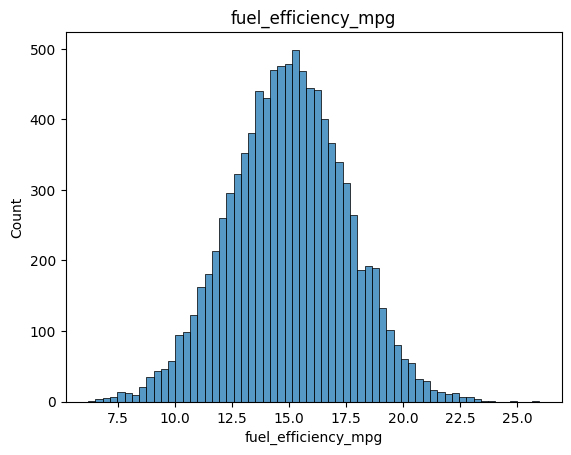

In [22]:
sns.histplot(df.fuel_efficiency_mpg)
plt.title("fuel_efficiency_mpg")

In [23]:
df.horsepower.median()

np.float64(149.0)

In [35]:
n = len(df)
n

9704

In [36]:
n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_test - n_val

n_train, n_val, n_test

(5824, 1940, 1940)

In [49]:
idx = np.arange(n)

In [50]:
np.random.seed(42)
np.random.shuffle(idx)

In [52]:
df_train = df.iloc[idx[:n_train]]
df_test = df.iloc[idx[n_train:n_train + n_test]]
df_val = df.iloc[idx[n_test + n_train:]]

In [58]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [59]:
df_train = df_train.reset_index(drop= True)
df_val = df_val.reset_index(drop= True)
df_test = df_test.reset_index(drop= True)

In [62]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [63]:
del df_train["fuel_efficiency_mpg"]
del df_val["fuel_efficiency_mpg"]
del df_test["fuel_efficiency_mpg"]

In [65]:
len(y_train)

5824

In [69]:
df_train[columns_used].isna().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [71]:
X_train_0 = df_train[columns_used].fillna(0).values

In [72]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [74]:
w0, w = train_linear_regression(X_train_0, y_train)

In [78]:
w0, w

(np.float64(28.827365475106156),
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992869e-04]))

In [75]:
y_pred = w0 + X_train_0.dot(w)

<Axes: ylabel='Count'>

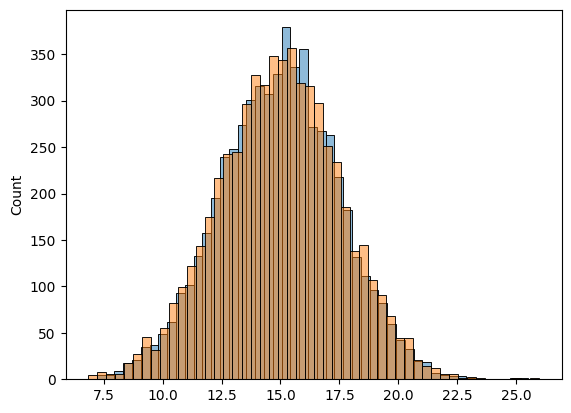

In [77]:
sns.histplot(y_pred, alpha = 0.5)
sns.histplot(y_train, alpha = 0.5)

In [ ]:
horsepower_mean = df_train.horsepower.mean()
print(horsepower_mean)
X_train_mean = df_train[columns_used].fillna(horsepower_mean).values

149.54476367006487


In [82]:
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

In [83]:
w0_mean, w_mean

(np.float64(28.925259952113596),
 array([ 0.00012093,  0.01030308, -0.00501009, -0.00023463]))

In [84]:
y_pred_mean = w0 + X_train_0.dot(w)

<Axes: ylabel='Count'>

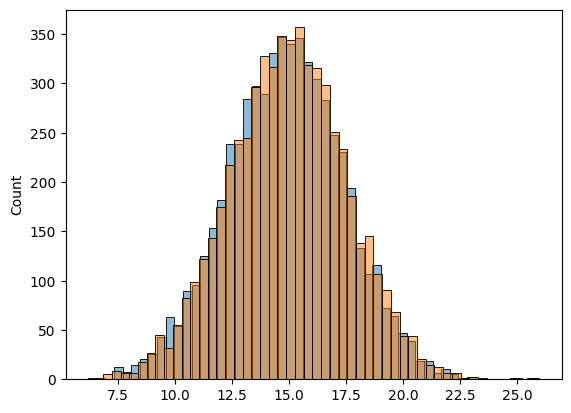

In [86]:
sns.histplot(y_pred_mean, alpha = 0.5)
sns.histplot(y_train, alpha = 0.5)

In [87]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [99]:
def prepare_X_0(df):
    df_num = df[columns_used]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


def prepare_X_mean(df):
    df_num = df[columns_used]
    df_num = df_num.fillna(horsepower_mean)
    X = df_num.values
    return X

In [97]:
X_train_0 = prepare_X_0(df_train)
w0, w = train_linear_regression(X_train_0, y_train)

X_val = prepare_X_0(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5165003926115536)

In [100]:
X_train_mean = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train_mean, y_train)

X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.46250373873966527)

In [101]:
def train_linear_regression_reg(X,y,r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [106]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:

    X_train_0 = prepare_X_0(df_train)
    w0, w = train_linear_regression_reg(X_train_0, y_train, r = r)

    X_val = prepare_X_0(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score.round(2))

0 28.827365475106156 0.52
0.01 24.92683842008767 0.52
0.1 11.239661084961272 0.52
1 1.7315979411936366 0.52
5 0.3638075020692219 0.52
10 0.18306246622306527 0.52
100 0.018418017306977234 0.52


In [116]:
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    np.random.seed(s)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_test = df.iloc[idx[n_train:n_train + n_test]]
    df_val = df.iloc[idx[n_test + n_train:]]

    df_train = df_train.reset_index(drop= True)
    df_val = df_val.reset_index(drop= True)
    df_test = df_test.reset_index(drop= True)

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train["fuel_efficiency_mpg"]
    del df_val["fuel_efficiency_mpg"]
    del df_test["fuel_efficiency_mpg"]

    X_train_0 = prepare_X_0(df_train)
    w0, w = train_linear_regression(X_train_0, y_train)

    X_val = prepare_X_0(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)

    print(s, score)


0 0.5340485124291054
1 0.5273125355718433
2 0.5252633402144418
3 0.5146156913678427
4 0.5136826353379216
5 0.5160924153150925
6 0.5186248510224755
7 0.519721657373016
8 0.5254922205713117
9 0.5112415509612342


In [118]:
data = [
    0.5149343218438194,
    0.5149194930203931,
    0.5274445907702882,
    0.5139442606087306,
    0.5243094084556924,
    0.5138730172644154,
    0.5114379807698629,
    0.5116990729139036,
    0.5074208739060149,
    0.5219829570048601
]

std = np.std(data)
print(round(std, 3))

0.006


In [122]:
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_test = df.iloc[idx[n_train:n_train + n_test]]
df_val = df.iloc[idx[n_test + n_train:]]

df_train = df_train.reset_index(drop= True)
df_val = df_val.reset_index(drop= True)
df_test = df_test.reset_index(drop= True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train["fuel_efficiency_mpg"]
del df_val["fuel_efficiency_mpg"]
del df_test["fuel_efficiency_mpg"]


X_train_0 = prepare_X_0(df_train)
w0, w = train_linear_regression_reg(X_train_0, y_train, r = 0.001)

X_val = prepare_X_0(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)

print(score.round(3))



0.519
